## 분류용 예제 데이터 - 붓꽃 데이터
(Ref: https://datascienceschool.net/view-notebook/577a01e24d4f456bb5060da6e47054e1/)
(Ref: https://www.youtube.com/watch?v=bwZ3Qiuj3i8 )

여기에서는 사이킷런(sklearn) 패키지에서 제공하는 분류용 예제 데이터의 일부를 소개한다. 이 데이터들을 살펴보면서 분류 모형에 대한 기초적인 공부를 시작한다.

붓꽃 데이터는 통계학자 피셔(R.A Fisher)의 붓꽃의 분류 연구에 기반한 데이터다. load_iris() 명령으로 로드한다. 데이터는 다음과 같이 구성되어 있다.

* **타겟 데이터** - 세토사(setosa), 베르시칼라(versicolor), 버지니카(virginica)의 세가지 붓꽃 종(species)
* **특징 데이터**
  - 꽃받침 길이(Sepal Length)
  - 꽃받침 폭(Sepal Width)
  - 꽃잎 길이(Petal Length)
  - 꽃잎 폭(Petal Width)

<img src="images/iris_petal_sepal.png" width="150">

좀 더 자세한 내용은 load_iris() 명령으로 로드한 데이터의 DESCR 속성으로 알 수 있다.

In [21]:
from sklearn.datasets import load_iris
iris = load_iris()
# print(iris.DESCR)

In [23]:
print(iris.feature_names)
print(iris.data[:5,:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [24]:
print(iris.target_names)
print(iris.target[140:])

['setosa' 'versicolor' 'virginica']
[2 2 2 2 2 2 2 2 2 2]


Pandas 패키지로 데이터 프레임을 만들어 일부 데이터를 살펴본다.

In [5]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


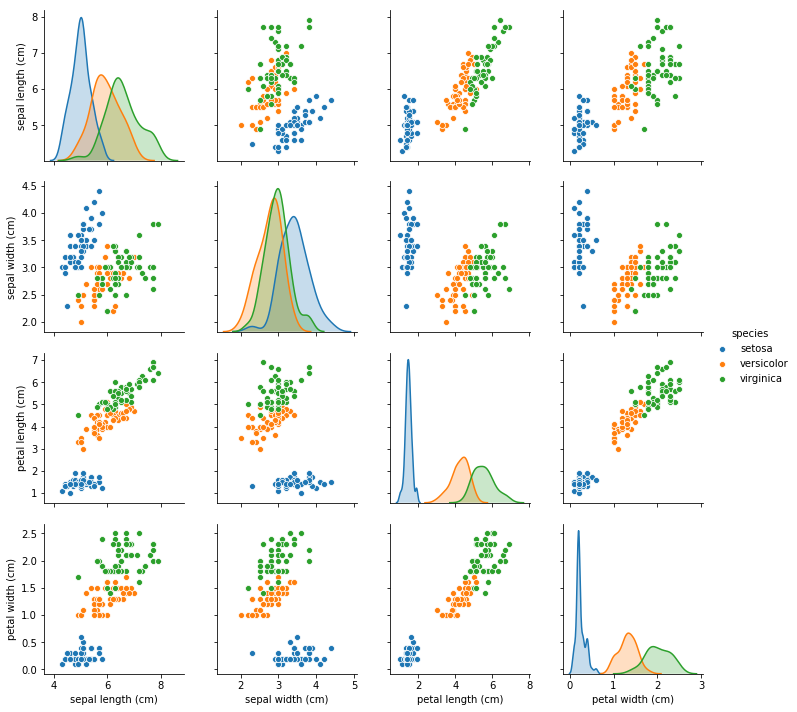

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df, hue="species")
plt.show()

이 분포를 잘 살펴보면 꽃잎의 길이 만으로도 세토사와 다른 종을 분류할 수 있다는 것을 알 수 있다.

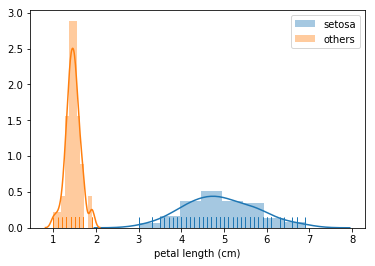

In [20]:
sns.distplot(df[df.species != "setosa"]["petal length (cm)"], hist=True, rug=True, label="setosa")
sns.distplot(df[df.species == "setosa"]["petal length (cm)"], hist=True, rug=True, label="others")
plt.legend()
plt.show()

#### 연습문제 1
꽃잎 길이(petal length)의 임계값(threshold value)이 얼마이면 세토사와 다른종 을 완벽하게 구분할 수 있는가?

하지만 베르시칼라와 버지니카는 이 방법으로 완벽한 구분이 불가능하다.

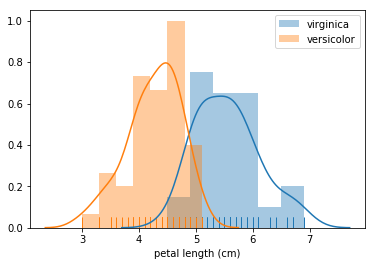

In [21]:
sns.distplot(df[df.species =="virginica"]["petal length (cm)"], hist=True, rug=True, label="virginica")
sns.distplot(df[df.species =="versicolor"]["petal length (cm)"], hist=True, rug=True, label="versicolor")
plt.legend()
plt.show()

#### 연습문제 2
1. 가장 적합한 꽃잎 길이의 기준값(threshold value)을 생각하고 이 값을 이용하여 베르시칼라와 버지니카를 분류하라.

2. 위 방법에 따라서 분류하였을 때 잘못 분류된 표본의 갯수는 몇개인가?

### Example


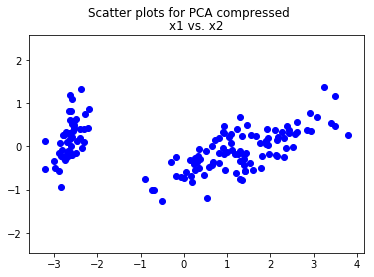

In [30]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=3)
iris_low = pca.fit_transform(iris.data)
iris_pca = pca.inverse_transform(iris_low)
fig, ax1 = plt.subplots()
fig.suptitle('Scatter plots for PCA compressed ')
ax1.scatter(iris_low[:,0],iris_low[:,1],c='b', marker='o')
ax1.set_title("x1 vs. x2")
plt.axis('equal')
plt.show()

### Example
다음 코드는 붓꽃 데이터를 1차원으로 차원축소(근사)하는 예제 코드다.

fit_transform() 메서드로 구한 X_low는 1차원 근사 데이터의 집합이다. 이 값을 다시 inverse_transform() 메서드에 넣어서 구한 X2는 다시 2차원으로 복귀한 근사 데이터의 집합이다.

In [25]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
from sklearn.preprocessing import StandardScaler

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

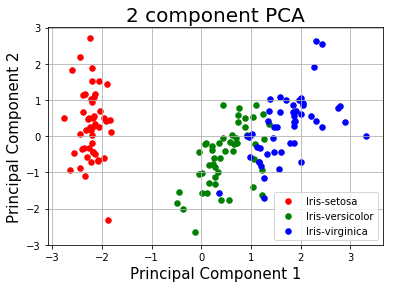

In [36]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 30)
ax.legend(targets)
ax.grid()